In [1]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot

%matplotlib inline

import pickle

In [2]:
tspyro50_maes = [0.8502294319761768, 2.058178255389376]
tspyro50_rmses = [0.7323351955101777, 1.669260477581292]
tspyro100_maes = [0.8653411878818742, 2.1479501645277885, 2.4436408891363564, 2.792641936408685]
tspyro100_rmses = [0.7512579355320007, 1.7474595203581287, 1.968976792718816, 2.226625794840761]
tspyro200_maes = [0.874624522611947, 2.237692624357488, 2.5935816969945495, 2.9433009674490407, 2.6289506112212813, 3.0083004808488405, 3.19312441743973, 3.966788703810182]
tspyro200_rmses = [0.7632552779248519, 1.8212217962016313, 2.0851942473455196, 2.3340291578192094, 2.1681218620217457, 2.525915438280695, 2.5487812915927033, 3.224629524623243]
tspyro400_maes = [0.8786866298803343, 2.2829584838242463, 2.6784738337212763, 3.083073549801344, 2.7241048266002004, 3.1258731160701245, 3.414242006198563, 4.184039084599426, 3.2658502735676875, 3.4826495832261197, 3.867569287856765, 3.557375055379077, 3.8852205458360194, 4.409707158751317, 3.798767265864522, 3.8951981334757537]
tspyro400_rmses = [0.7681408531097272, 1.862415300714974, 2.147325659603729, 2.457539051981765, 2.2509603447131368, 2.6479593342740353, 2.746348696885147, 3.4083776043600573, 2.824300551261463, 2.8562163685306947, 3.179186066178978, 2.9878231655463465, 3.194972809409215, 3.5252107312339924, 3.0292009998932854, 3.153267361779218]
baseline_maes = [1.0044713147793631, 2.6111735380135754, 2.955836006699127, 3.2902230666374574, 3.425830820341005, 3.928766308002667, 3.8066335182123785, 5.003394888707938, 4.697524615551628, 4.585731121471976, 5.14728358196081, 4.915395616275572, 4.96830275482068, 5.025645558295475, 4.923574238439797, 4.8680526854355515]
baseline_rmses = [0.8792450279759404, 2.110138213604105, 2.370317088949646, 2.6931497682536456, 2.775357550521452, 3.2740476929696296, 3.1174472212518136, 4.066068149519668, 3.723001736762334, 3.8201985586541647, 4.177033382722588, 3.8835256664555993, 3.967483425729824, 4.043021430634732, 3.9370570679804184, 3.964995034242093]

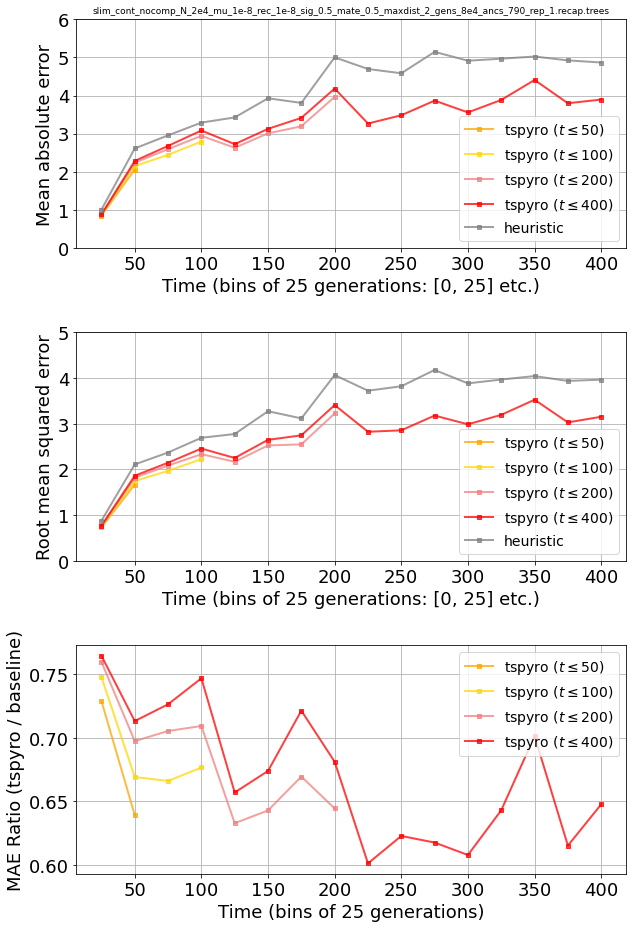

In [3]:
f, (ax0, ax1, ax2) = pyplot.subplots(3, 1, figsize=(9, 13))

colors = ['orange', 'gold', 'lightcoral', 'red']

ax0.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax0.set_ylabel("Mean absolute error", fontsize=18)
ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.set_title("slim_cont_nocomp_N_2e4_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8e4_ancs_790_rep_1.recap.trees",
              fontsize=9)

for tspyro, cutoff, color in zip([tspyro50_maes, tspyro100_maes, tspyro200_maes, tspyro400_maes],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ax0.plot(np.arange(1, len(tspyro)+1) * 25, tspyro, alpha=0.75, color=color, lw=2, marker='s', markersize=4, 
            label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax0.plot(np.arange(1, len(baseline_maes)+1) * 25, baseline_maes, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax0.grid()
ax0.set_ylim(0, 6)
ax0.legend(fontsize=14, loc='lower right')

ax1.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax1.set_ylabel("Root mean squared error", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)

for tspyro, cutoff, color in zip([tspyro50_rmses, tspyro100_rmses, tspyro200_rmses, tspyro400_rmses],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ax1.plot(np.arange(1, len(tspyro)+1) * 25, tspyro, alpha=0.75, color=color, lw=2, marker='s', markersize=4, 
            label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax1.plot(np.arange(1, len(baseline_rmses)+1) * 25, baseline_rmses, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax1.grid()
ax1.set_ylim(0, 5)
ax1.legend(fontsize=14, loc='lower right')

ax2.set_xlabel("Time (bins of 25 generations)", fontsize=18)
ax2.set_ylabel("MAE Ratio (tspyro / baseline)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
for tspyro, cutoff, color in zip([tspyro50_rmses, tspyro100_rmses, tspyro200_rmses, tspyro400_rmses],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ratio = np.array(tspyro) 
    ratio /= np.array(baseline_maes)[:ratio.shape[0]]
    ax2.plot(np.arange(1, len(ratio)+1) * 25, 
             ratio, color=color, lw=2, marker='s', alpha=0.75, markersize=4,
             label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax2.legend(fontsize=14, loc='upper right')
ax2.grid()

pyplot.tight_layout()
pyplot.savefig('790_ancients_spatial_stats.pdf')

In [4]:
tspyro50_maes = [0.8788210096280066, 1.8503353643119285]
tspyro50_rmses = [0.7731156513087296, 1.5339227202979435]
tspyro100_maes = [0.8949558451966935, 1.9742487048558504, 2.259698412485377, 2.82574875525507]
tspyro100_rmses = [0.7935962732658434, 1.6199829093026303, 1.8384098704951708, 2.246460329488679]
tspyro200_maes = [0.9068020475461602, 2.1215738155694615, 2.506106510110219, 3.1595590899584884, 3.2543684430944744, 3.6565172397242174, 3.5459995734762, 3.828126247802869]
tspyro200_rmses = [0.8098351598411232, 1.7491036519777083, 2.040656064530303, 2.4818860226491566, 2.5996785194712486, 2.915555667167016, 2.8783443518407825, 3.1900634739638565]
tspyro400_maes = [0.9112184270757456, 2.171714691066809, 2.5831530975479735, 3.286759201444339, 3.4078857896409023, 3.7771825290835377, 3.6639376034158864, 3.971661062731965, 5.100546808727053, 4.441353003465375, 4.93363811907734, 6.201569471185526, 4.382761731826822, 7.554552974330036, 6.412268235003262, 6.730284707742246]
tspyro400_rmses = [0.8163158257750656, 1.7963655399837908, 2.106055098336172, 2.572860342795093, 2.7076079317800517, 3.012842934044324, 2.980113775565215, 3.301126945885612, 4.102618500549332, 3.5232872126929826, 3.828101102669367, 4.9819622721649655, 3.7006376175422746, 5.9726067094831095, 5.3193494852489795, 5.043704785012415]
baseline_maes = [1.0079420106612729, 2.3374842109535123, 2.9762813750102173, 3.599503955421151, 3.90777057321738, 4.620527210165024, 4.567165974608048, 5.146678595514726, 5.965489728899548, 5.165602888985052, 6.022924735202721, 6.386797585683086, 5.871084670556424, 7.788876950429838, 7.632769096159417, 6.792815208512286]
baseline_rmses = [0.8975941509868607, 1.908794720901592, 2.3870279535733876, 2.8636054003864673, 3.1597791734427294, 3.7678021550672898, 3.6914830074121383, 4.070178964604312, 4.664659302570855, 4.050238643188328, 4.712729765041333, 5.154462095883289, 4.701971201837697, 6.256645854554221, 6.060635468789996, 5.28230672730076]

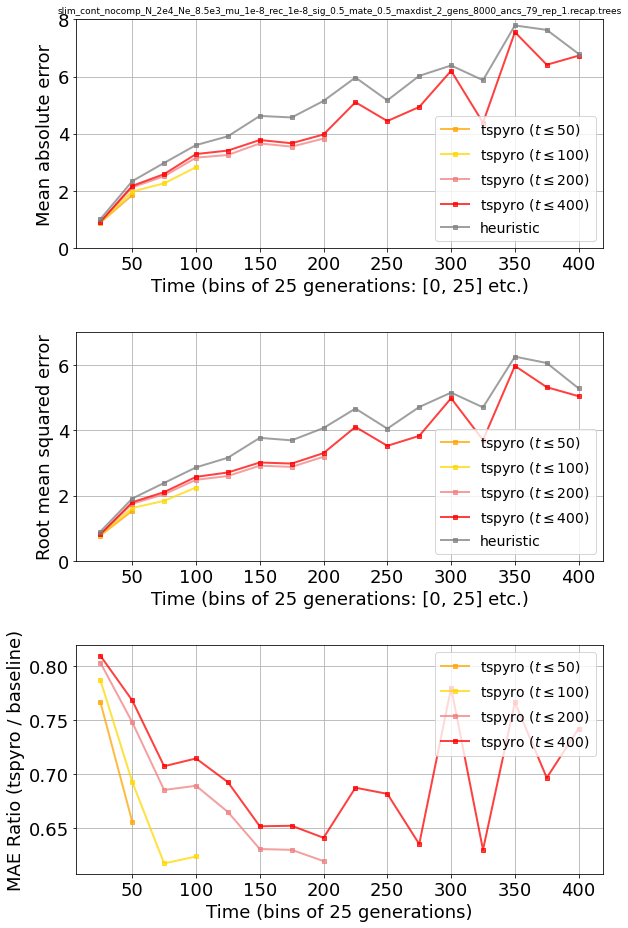

In [9]:
f, (ax0, ax1, ax2) = pyplot.subplots(3, 1, figsize=(9, 13))

colors = ['orange', 'gold', 'lightcoral', 'red']

ax0.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax0.set_ylabel("Mean absolute error", fontsize=18)
ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.set_title("slim_cont_nocomp_N_2e4_Ne_8.5e3_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8000_ancs_79_rep_1.recap.trees",
              fontsize=9)

for tspyro, cutoff, color in zip([tspyro50_maes, tspyro100_maes, tspyro200_maes, tspyro400_maes],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ax0.plot(np.arange(1, len(tspyro)+1) * 25, tspyro, alpha=0.75, color=color, lw=2, marker='s', markersize=4, 
            label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax0.plot(np.arange(1, len(baseline_maes)+1) * 25, baseline_maes, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax0.grid()
ax0.set_ylim(0, 8)
ax0.legend(fontsize=14, loc='lower right')

ax1.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax1.set_ylabel("Root mean squared error", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)

for tspyro, cutoff, color in zip([tspyro50_rmses, tspyro100_rmses, tspyro200_rmses, tspyro400_rmses],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ax1.plot(np.arange(1, len(tspyro)+1) * 25, tspyro, alpha=0.75, color=color, lw=2, marker='s', markersize=4, 
            label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax1.plot(np.arange(1, len(baseline_rmses)+1) * 25, baseline_rmses, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax1.grid()
ax1.set_ylim(0, 7)
ax1.legend(fontsize=14, loc='lower right')

ax2.set_xlabel("Time (bins of 25 generations)", fontsize=18)
ax2.set_ylabel("MAE Ratio (tspyro / baseline)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
for tspyro, cutoff, color in zip([tspyro50_rmses, tspyro100_rmses, tspyro200_rmses, tspyro400_rmses],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ratio = np.array(tspyro) 
    ratio /= np.array(baseline_maes)[:ratio.shape[0]]
    ax2.plot(np.arange(1, len(ratio)+1) * 25, 
             ratio, color=color, lw=2, marker='s', alpha=0.75, markersize=4,
             label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax2.legend(fontsize=14, loc='upper right')
ax2.grid()

pyplot.tight_layout()
pyplot.savefig('79_ancients_spatial_stats.pdf')

In [10]:
tspyro50_maes = [0.8633160956179764, 1.978288974581756]
tspyro50_rmses = [0.7460106858136394, 1.6068672914561242]
tspyro100_maes = [0.8750774289861184, 2.034255330242571, 2.573357487254105, 3.0004831466676163]
tspyro100_rmses = [0.7589224732797141, 1.6508518000882109, 2.1179560890892826, 2.4264277215108443]
tspyro200_maes = [0.8809045445911611, 2.12045219708084, 2.7422426350265456, 3.294638724574, 3.188061784376897, 3.635439942354694, 3.5066823137284002, 4.484494356184218]
tspyro200_rmses = [0.7657147779390621, 1.721269555417137, 2.232807443708886, 2.6141089257248264, 2.557445319313886, 2.9152596997919002, 2.8476894982915573, 3.5695221692670063]
tspyro400_maes = [0.8828213684994468, 2.1431976807583606, 2.785613409303196, 3.385836516394307, 3.2778423537602306, 3.824817181346882, 3.714192187526327, 4.549274347147812, 5.1918786014188045, 6.0368894097779595, 5.5400029903478805, 5.677279069821843, 5.267274160932282, 5.367762106118442, 5.2405015655914395, 5.158548611247225]
tspyro400_rmses = [0.7678575157283796, 1.739721764941297, 2.263183236312054, 2.6843459584871563, 2.615226380330329, 3.069674311235786, 3.012788976906797, 3.609441087971344, 3.9663738191758826, 4.481487228196027, 4.327820259412954, 4.649947850863277, 4.262561981251751, 3.9019187174529444, 4.08189240820263, 4.366417563285282]
baseline_maes = [1.034836315320132, 2.563143616005085, 3.2305070630009443, 3.8916401413335073, 3.7660031435251797, 3.8216781626292247, 4.099716475300906, 5.017635639579023, 5.1717089450515195, 6.663989810971715, 5.365125574843216, 6.23953943454397, 5.556841779607503, 5.430865503485584, 6.665756487923218, 6.107117715730476]
baseline_rmses = [0.918986397928374, 2.0853875973610294, 2.6332586273298206, 3.115526350370241, 3.055774537450814, 3.048163467159351, 3.3812370232536453, 4.0792857704558685, 4.034261761480091, 5.044533664924378, 4.2899521548493755, 4.893893730321086, 4.315815782714793, 4.111268917654514, 5.0701352342816595, 5.329401522476927]

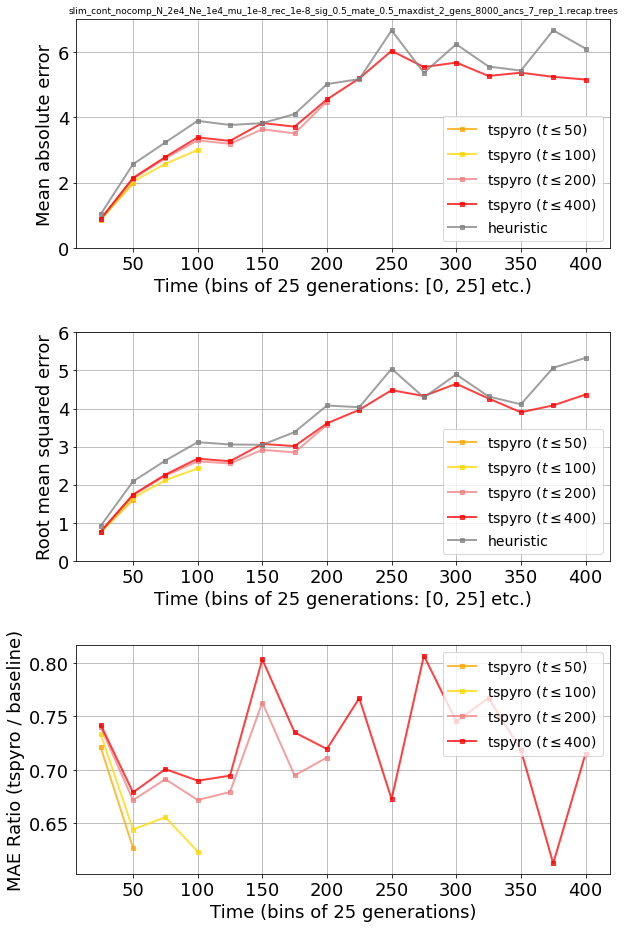

In [12]:
f, (ax0, ax1, ax2) = pyplot.subplots(3, 1, figsize=(9, 13))

colors = ['orange', 'gold', 'lightcoral', 'red']

ax0.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax0.set_ylabel("Mean absolute error", fontsize=18)
ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.set_title("slim_cont_nocomp_N_2e4_Ne_1e4_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8000_ancs_7_rep_1.recap.trees",
              fontsize=9)

for tspyro, cutoff, color in zip([tspyro50_maes, tspyro100_maes, tspyro200_maes, tspyro400_maes],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ax0.plot(np.arange(1, len(tspyro)+1) * 25, tspyro, alpha=0.75, color=color, lw=2, marker='s', markersize=4, 
            label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax0.plot(np.arange(1, len(baseline_maes)+1) * 25, baseline_maes, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax0.grid()
ax0.set_ylim(0, 7)
ax0.legend(fontsize=14, loc='lower right')

ax1.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax1.set_ylabel("Root mean squared error", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)

for tspyro, cutoff, color in zip([tspyro50_rmses, tspyro100_rmses, tspyro200_rmses, tspyro400_rmses],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ax1.plot(np.arange(1, len(tspyro)+1) * 25, tspyro, alpha=0.75, color=color, lw=2, marker='s', markersize=4, 
            label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax1.plot(np.arange(1, len(baseline_rmses)+1) * 25, baseline_rmses, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax1.grid()
ax1.set_ylim(0, 6)
ax1.legend(fontsize=14, loc='lower right')

ax2.set_xlabel("Time (bins of 25 generations)", fontsize=18)
ax2.set_ylabel("MAE Ratio (tspyro / baseline)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
for tspyro, cutoff, color in zip([tspyro50_rmses, tspyro100_rmses, tspyro200_rmses, tspyro400_rmses],
                          [50.0, 100.0, 200.0, 400.0], colors):
    ratio = np.array(tspyro) 
    ratio /= np.array(baseline_maes)[:ratio.shape[0]]
    ax2.plot(np.arange(1, len(ratio)+1) * 25, 
             ratio, color=color, lw=2, marker='s', alpha=0.75, markersize=4,
             label='tspyro ($t \\leq {}$)'.format(int(cutoff)))

ax2.legend(fontsize=14, loc='upper right')
ax2.grid()

pyplot.tight_layout()
pyplot.savefig('7_ancients_spatial_stats.pdf')